<h1>Name: Muhammad Sheroz StudentID: 9852</h1>

<h3>Packages</h3>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Read All Create CSV By Own Structure</h3>

In [6]:
DimCst = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW/DimCst.csv")

In [7]:
DimLoc = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW/DimLoc.csv")

In [8]:
DimPrd = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW/DimPrd.csv")

In [9]:
DimDt = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW/DimDt.csv")

In [10]:
SalesFct = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW/SalesFct.csv")

In [11]:
SaleCstsFct = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW/SaleCstsFct.csv")

<h3>Top 3 Sales Product</h3>

In [12]:
DimCst.head()

,CustKey,Customer ID,Customer Name,Segment
0,1,AA-10315,Alex Avila,Consumer
1,2,AA-10375,Allen Armold,Consumer
2,3,AA-10480,Andrew Allen,Consumer
3,4,AA-10645,Anna Andreadi,Consumer
4,5,AB-10015,Aaron Bergman,Consumer


In [13]:
DimLoc.head()

,CityKey,City,State,Country,Region
0,1,Aberdeen,South Dakota,United States,Central
1,2,Abilene,Texas,United States,Central
2,3,Akron,Ohio,United States,East
3,4,Albuquerque,New Mexico,United States,West
4,5,Alexandria,Virginia,United States,South


In [14]:
DimDt.head()

,Order Date,Day,Week,Month,Quarter,Year
0,2014-01-03,3,1,1,1,2014
1,2014-01-04,4,1,1,1,2014
2,2014-01-05,5,1,1,1,2014
3,2014-01-06,6,2,1,1,2014
4,2014-01-07,7,2,1,1,2014


In [15]:
SalesFct.head()

,Order Date,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,CostAmt
0,2014-01-03,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,10.8968
1,2014-01-04,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870,9.0270
2,2014-01-04,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717,7.5123
3,2014-01-04,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748,337.5108
4,2014-01-05,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840,14.6520


In [16]:
SaleCstsFct.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512
1,2014-01-04,PO-19195,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870
2,2014-01-04,PO-19195,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717
3,2014-01-04,PO-19195,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748
4,2014-01-05,MB-18085,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840


In [17]:
largerst = SaleCstsFct.nlargest(3,'SalesQtyTotal')

In [18]:
largerst

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal
4369,2016-03-15,SJ-20125,Jackson,OFF-PA-10001954,16,365.440,0.0,168.1024
2807,2015-07-24,SS-20515,Louisville,OFF-BI-10000069,15,225.150,0.0,103.5690
112,2014-02-17,DL-13315,Chicago,OFF-AR-10003631,14,54.208,0.2,8.8088


In [19]:
print(largerst['Product ID'])

4369    OFF-PA-10001954
2807    OFF-BI-10000069
112     OFF-AR-10003631
Name: Product ID, dtype: object


In [20]:
top3 = SaleCstsFct.groupby('Product ID').agg(TotalQty = ('SalesQtyTotal' , 'sum'))

In [21]:
top3.head()

,TotalQty
Product ID,
FUR-BO-10000112,9
FUR-BO-10000330,10
FUR-BO-10000362,14
FUR-BO-10000468,21
FUR-BO-10000711,12


In [22]:
top3 = top3.nlargest(3,'TotalQty')
top3

,TotalQty
Product ID,
TEC-AC-10003832,75
OFF-PA-10001970,70
OFF-BI-10001524,67


In [23]:
top3 = pd.merge(top3,DimPrd,on='Product ID')

In [24]:
top3

,Product ID,TotalQty,Product Name,Sub-Category,Category
0,TEC-AC-10003832,75,Logitech P710e Mobile Speakerphone,Accessories,Technology
1,TEC-AC-10003832,75,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,Accessories,Technology
2,OFF-PA-10001970,70,Xerox 1908,Paper,Office Supplies
3,OFF-PA-10001970,70,Xerox 1881,Paper,Office Supplies
4,OFF-BI-10001524,67,GBC Premium Transparent Covers with Diagonal L...,Binders,Office Supplies


In [25]:
top3 = top3[['Product ID','Product Name','TotalQty']]
top3

,Product ID,Product Name,TotalQty
0,TEC-AC-10003832,Logitech P710e Mobile Speakerphone,75
1,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,75
2,OFF-PA-10001970,Xerox 1908,70
3,OFF-PA-10001970,Xerox 1881,70
4,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,67


In [26]:
top3_catgy = pd.merge(SaleCstsFct,DimPrd,on='Product ID')
top3_catgy.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Product Name,Sub-Category,Category
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,JH-15430,Medford,OFF-PA-10000174,4,32.896,0.2,11.1024,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,LR-17035,Santa Clara,OFF-PA-10000174,2,20.560,0.0,9.6632,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,DA-13450,Lancaster,OFF-PA-10000174,4,32.896,0.2,11.1024,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,AB-10255,Philadelphia,OFF-PA-10000174,2,16.448,0.2,5.5512,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies


In [27]:
top3_catgy = top3_catgy.groupby('Product ID').agg(TotalQty = ('Category' , 'sum'))

In [28]:
top3_catgy.head()

,TotalQty
Product ID,
FUR-BO-10000112,Furniture
FUR-BO-10000330,FurnitureFurnitureFurniture
FUR-BO-10000362,FurnitureFurnitureFurnitureFurnitureFurniture
FUR-BO-10000468,FurnitureFurnitureFurnitureFurnitureFurnitureF...
FUR-BO-10000711,FurnitureFurniture


In [29]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

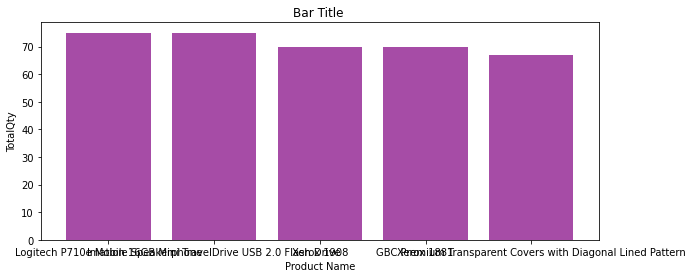

In [30]:
plt.figure(figsize=(10,4))
plt.title("Bar Title ")
plt.xlabel("Product Name")
plt.ylabel("TotalQty")
plt.bar(top3["Product Name"] , top3.TotalQty ,color='purple',alpha=0.7)


<h3>Top 3 Category</h3>

In [31]:
ctg = pd.merge(SaleCstsFct,DimPrd,on='Product ID')
ctg.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Product Name,Sub-Category,Category
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,JH-15430,Medford,OFF-PA-10000174,4,32.896,0.2,11.1024,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,LR-17035,Santa Clara,OFF-PA-10000174,2,20.560,0.0,9.6632,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,DA-13450,Lancaster,OFF-PA-10000174,4,32.896,0.2,11.1024,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,AB-10255,Philadelphia,OFF-PA-10000174,2,16.448,0.2,5.5512,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies


In [32]:
ctg = ctg.groupby('Category').agg(TotalQty = ('SalesQtyTotal' , 'sum')).reset_index()

In [33]:
ctg

,Category,TotalQty
0,Furniture,8379
1,Office Supplies,23518
2,Technology,7249


In [34]:
ctg = ctg.nlargest(3,'TotalQty')
ctg

,Category,TotalQty
1,Office Supplies,23518
0,Furniture,8379
2,Technology,7249


In [35]:
ctg.sort_values(by = 'Category'  , ascending=False)

,Category,TotalQty
2,Technology,7249
1,Office Supplies,23518
0,Furniture,8379


<BarContainer object of 3 artists>

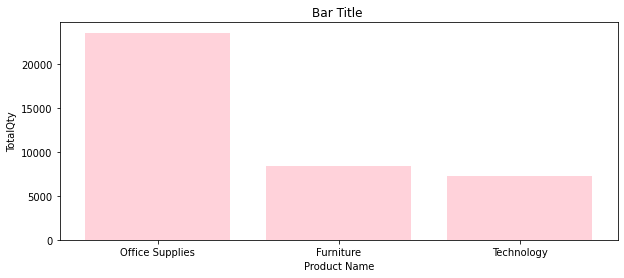

In [36]:
plt.figure(figsize=(10,4))
plt.title("Bar Title ")
plt.xlabel("Product Name")
plt.ylabel("TotalQty")
plt.bar(ctg.Category , ctg.TotalQty ,color='pink',alpha=0.7)


<h3>Find top 3 sales Products lay on quarter 3</h3>

In [37]:
date_Qtr = pd.merge(SaleCstsFct,DimDt ,on='Order Date')
date_Qtr.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Day,Week,Month,Quarter,Year
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,3,1,1,1,2014
1,2014-01-04,PO-19195,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870,4,1,1,1,2014
2,2014-01-04,PO-19195,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717,4,1,1,1,2014
3,2014-01-04,PO-19195,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748,4,1,1,1,2014
4,2014-01-05,MB-18085,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840,5,1,1,1,2014


In [38]:
date_Qtr = pd.merge(date_Qtr,DimPrd ,on='Product ID')
date_Qtr.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Day,Week,Month,Quarter,Year,Product Name,Sub-Category,Category
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,3,1,1,1,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,JH-15430,Medford,OFF-PA-10000174,4,32.896,0.2,11.1024,24,9,2,1,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,LR-17035,Santa Clara,OFF-PA-10000174,2,20.560,0.0,9.6632,7,36,9,3,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,DA-13450,Lancaster,OFF-PA-10000174,4,32.896,0.2,11.1024,26,39,9,3,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,AB-10255,Philadelphia,OFF-PA-10000174,2,16.448,0.2,5.5512,3,49,12,4,2015,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies


In [39]:
date_Qtr = date_Qtr[["Product ID" , "Product Name" ,"SalesQtyTotal" ,'Quarter']]

In [40]:
date_Qtr = date_Qtr[date_Qtr.Quarter == 3]

In [41]:
date_Qtr.head()

,Product ID,Product Name,SalesQtyTotal,Quarter
2,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",2,3
3,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",4,3
5,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",4,3
8,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,2,3
9,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3,3


In [93]:
date_Qtr = date_Qtr.groupby(['Product ID' , 'Product Name']).agg(TotalQty = ('SalesQtyTotal' , 'sum')).reset_index()

In [95]:
date_Qtr = date_Qtr.nlargest(3,['TotalQty'])

In [96]:
date_Qtr.head()

,Product ID,Product Name,TotalQty
551,OFF-BI-10002012,Wilson Jones Easy Flow II Sheet Lifters,32
763,OFF-LA-10002762,Avery 485,32
972,OFF-PA-10004100,Xerox 216,32


<h3>Find top 3 Sub-Category sales product</h3>

In [42]:
sub_ctg = pd.merge(SaleCstsFct,DimPrd,on='Product ID')
sub_ctg.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Product Name,Sub-Category,Category
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,JH-15430,Medford,OFF-PA-10000174,4,32.896,0.2,11.1024,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,LR-17035,Santa Clara,OFF-PA-10000174,2,20.560,0.0,9.6632,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,DA-13450,Lancaster,OFF-PA-10000174,4,32.896,0.2,11.1024,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,AB-10255,Philadelphia,OFF-PA-10000174,2,16.448,0.2,5.5512,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies


In [43]:
sub_ctg = sub_ctg.groupby('Sub-Category').agg(TotalQty = ('SalesQtyTotal' , 'sum')).reset_index()

In [45]:
sub_ctg

,Sub-Category,TotalQty
0,Accessories,3138
1,Appliances,1758
2,Art,3030
3,Binders,6119
4,Bookcases,910
5,Chairs,2407
6,Copiers,234
7,Envelopes,906
8,Fasteners,914
9,Furnishings,3821


In [46]:
sub_ctg = sub_ctg.nlargest(3, 'TotalQty')
sub_ctg

,Sub-Category,TotalQty
3,Binders,6119
12,Paper,5507
9,Furnishings,3821


In [47]:
sub_ctg.sort_values(by = "Sub-Category" , ascending=False)

,Sub-Category,TotalQty
12,Paper,5507
9,Furnishings,3821
3,Binders,6119


<BarContainer object of 3 artists>

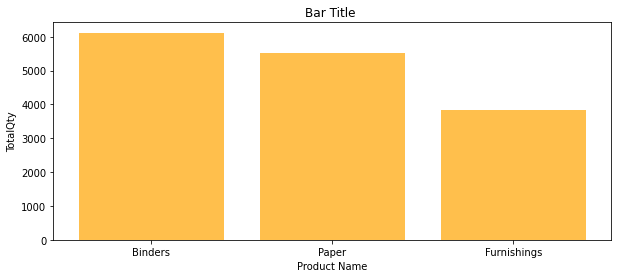

In [51]:
plt.figure(figsize=(10,4))
plt.title("Bar Title ")
plt.xlabel("Product Name")
plt.ylabel("TotalQty")
plt.bar(sub_ctg['Sub-Category'] , sub_ctg.TotalQty ,color='orange',alpha=0.7)

<h3>Find top 3 product lay on quarter 2</h3>

In [52]:
sub_ctg_date_Qtr = pd.merge(SaleCstsFct,DimDt ,on='Order Date')
sub_ctg_date_Qtr.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Day,Week,Month,Quarter,Year
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,3,1,1,1,2014
1,2014-01-04,PO-19195,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870,4,1,1,1,2014
2,2014-01-04,PO-19195,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717,4,1,1,1,2014
3,2014-01-04,PO-19195,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748,4,1,1,1,2014
4,2014-01-05,MB-18085,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840,5,1,1,1,2014


In [53]:
sub_ctg_date_Qtr = pd.merge(sub_ctg_date_Qtr,DimPrd ,on='Product ID')
sub_ctg_date_Qtr.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,Day,Week,Month,Quarter,Year,Product Name,Sub-Category,Category
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,3,1,1,1,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,JH-15430,Medford,OFF-PA-10000174,4,32.896,0.2,11.1024,24,9,2,1,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,LR-17035,Santa Clara,OFF-PA-10000174,2,20.560,0.0,9.6632,7,36,9,3,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,DA-13450,Lancaster,OFF-PA-10000174,4,32.896,0.2,11.1024,26,39,9,3,2014,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,AB-10255,Philadelphia,OFF-PA-10000174,2,16.448,0.2,5.5512,3,49,12,4,2015,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies


In [56]:
sub_ctg_date_Qtr = sub_ctg_date_Qtr[["Product ID" , "Product Name" ,"SalesQtyTotal" ,'Quarter']]

In [58]:
sub_ctg_date_Qtr = sub_ctg_date_Qtr[sub_ctg_date_Qtr.Quarter == 2]

In [59]:
sub_ctg_date_Qtr.head()

,Product ID,Product Name,SalesQtyTotal,Quarter
16,OFF-LA-10003223,Avery 508,2,2
29,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,6,2
30,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,11,2
35,OFF-AR-10002399,"Dixon Prang Watercolor Pencils, 10-Color Set w...",4,2
36,OFF-AR-10002399,"Dixon Prang Watercolor Pencils, 10-Color Set w...",4,2


In [61]:
sub_ctg_date_Qtr = sub_ctg_date_Qtr.groupby(['Product ID' , 'Product Name']).agg(TotalQty = ('SalesQtyTotal' , 'sum')).reset_index()

In [62]:
sub_ctg_date_Qtr = sub_ctg_date_Qtr.nlargest(3,['TotalQty'])

In [63]:
sub_ctg_date_Qtr.head()

,Product ID,Product Name,TotalQty
586,OFF-BI-10003982,Wilson Jones Century Plastic Molded Ring Binders,28
1090,TEC-AC-10003038,Kingston Digital DataTraveler 16GB USB 2.0,28
1104,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,27


In [65]:
sub_ctg_date_Qtr.sort_values(by = 'Product ID'  , ascending=False)

,Product ID,Product Name,TotalQty
1104,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,27
1090,TEC-AC-10003038,Kingston Digital DataTraveler 16GB USB 2.0,28
586,OFF-BI-10003982,Wilson Jones Century Plastic Molded Ring Binders,28
